# Initial Modeling with Final Data

In [ ]:
import pandas as pd

# Read in the full dataset
df = pd.read_csv('full_data.csv')


## Pre-processing

In [ ]:
# Drop unnecessary columns
df = df.drop(['Unnamed..0', 'EVENT_ID', 'ATTRACTION_ID', 'city', 'TRANSACTABLE', 'id',
              'CLASSIFICATION_TYPE', 'CLASSIFICATION_SUB_TYPE', 'artist_genres',
              'VENUE_CITY', 'VENUE_STREET', 'genre_0', 'genre_1', 'genre_2',
              'genre_3', 'genre_4', 'genre_5', 'genre_6', 'ATTRACTION_CLASSIFICATION_SEGMENT',
              'ATTRACTION_CLASSIFICATION_GENRE', 'ATTRACTION_CLASSIFICATION_SUB_GENRE', 'ATTRACTION_CLASSIFICATION_TYPE',
              'ATTRACTION_CLASSIFICATION_SUB_TYPE', 'state_name', 'first_artist', 'scrape_time',
              'VENUE_TIMEZONE', 'VENUE_ID'], axis=1)

In [ ]:
# Print remaining columns
print("\nRemaining columns:")
print(df.columns.tolist())


Remaining columns:
['EVENT_NAME', 'EVENT_START_DATETIME', 'EVENT_END_DATETIME', 'CLASSIFICATION_GENRE', 'CLASSIFICATION_SUB_GENRE', 'MIN_PRICE', 'MAX_PRICE', 'ATTRACTION_NAME', 'VENUE_NAME', 'VENUE_STATE_CODE', 'HOT_EVENT', 'artist_popularity', 'followers', 'population', 'city_ascii']


In [ ]:
# One hot encode the specified columns
df = pd.get_dummies(df, columns=['CLASSIFICATION_GENRE', 'CLASSIFICATION_SUB_GENRE', 'VENUE_STATE_CODE'])

# Print the first few rows of the dataframe to verify the encoding
print("\nDataframe after one hot encoding:")
print(df.head())



Dataframe after one hot encoding:
                  EVENT_NAME       EVENT_START_DATETIME EVENT_END_DATETIME  \
0                    Jordana  2025-02-23 01:00:00+00:00                NaN   
1               Robin Schulz  2025-03-16 05:00:00+00:00                NaN   
2  LOS ACOSTA EN NEW JERSEY!  2025-03-02 02:00:00+00:00                NaN   
3    LOS ACOSTA EN NEW YORK!  2025-03-01 02:00:00+00:00                NaN   
4    THUY - Wings World Tour  2025-03-02 04:00:00+00:00                NaN   

   MIN_PRICE  MAX_PRICE                ATTRACTION_NAME  \
0      20.00      20.00         Jordana|Rachel Bobbitt   
1      24.95      24.95                   Robin Schulz   
2      50.00      50.00  Los Acosta|La Sonora Dinamita   
3      56.38      56.38  Los Acosta|La Sonora Dinamita   
4      35.00      55.00                      thuy|ASTN   

                  VENUE_NAME  HOT_EVENT  artist_popularity  followers  ...  \
0            Bowery Ballroom       True                 55      78067

### Model 1: Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Select only the numerical columns for the model
numerical_columns = df.select_dtypes(include=['number']).columns
X = df[numerical_columns].drop(['MAX_PRICE', 'MIN_PRICE'], axis=1)
y = df['MIN_PRICE']

# Remove rows with NaN values
X = X.dropna()
y = y[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

from sklearn.metrics import r2_score

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")




Mean Squared Error: 278.7290560164858
R^2 Score: 0.5089779883193618


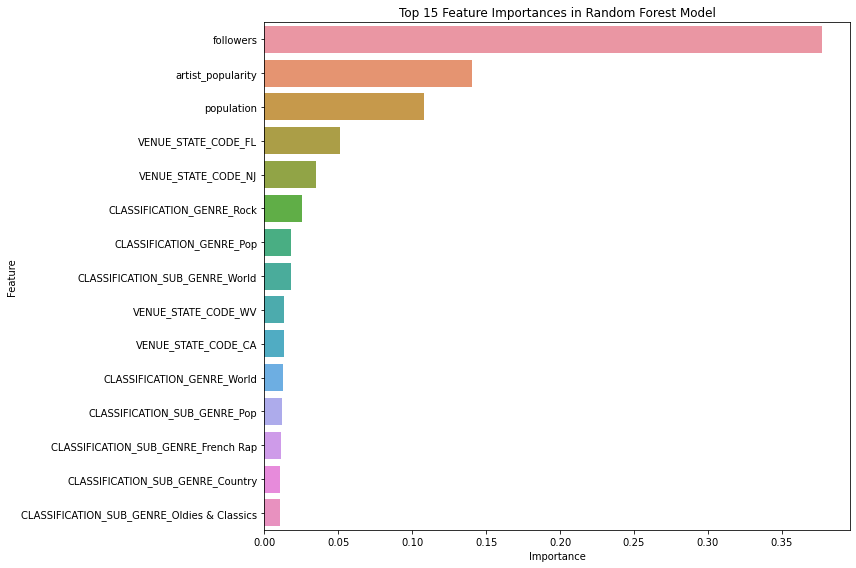

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Top 15 Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
